In [34]:
import cv2
import numpy as np
import tensorflow as tf
from matplotlib import pyplot as plt

from tensorflow.keras.models import load_model         #import all dependencies

model = load_model('model/dogclassifier.keras')        #load the model that we saved from dogclassifier.ipynb

def outputPrediction(yhat): #this is a very simple function that takes in the prediction (mathematically called y-hat, 
                            #which is a y with a ^ on top). All it does is, if the model predicts that its likely Todo (more than 0.5), 
                            #output that it predicted Todo, and same for the other condition)
    if yhat > 0.5:
        print('Model predicted it\'s Todo')
    else:
        print('Model predicted it\'s Liz')

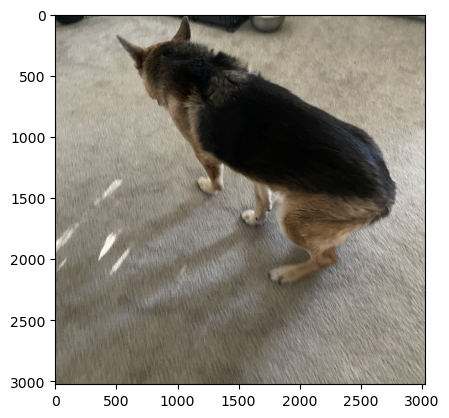

In [28]:
img = cv2.imread('Testing_Photos/IMG_0740.JPEG')         #obtain the image
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))         #put it in the regular RGB format
plt.show()                                               #show the image

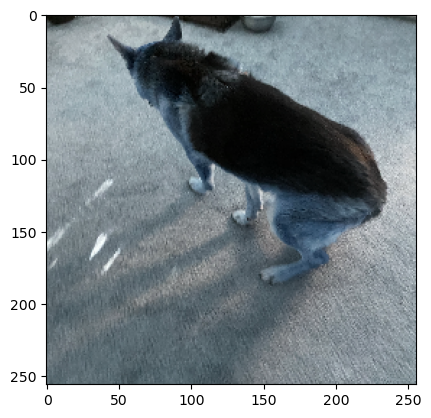

In [31]:
resize = tf.image.resize(img, (256, 256))            #resize it so that we can pass it to the model (it has to be 256 high x256 wide)
plt.imshow(resize.numpy().astype(int))               #display the image that the model will see
plt.show()

In [32]:
np.expand_dims(resize, 0)   #this adds an extra dimension to the image because models require the shape of each image to be 
                            #(1, 256, 256, 3), which means (batch of 1 image, 256px high, 256 wide, 3 pixel channels for RGB)
yhat = model.predict(np.expand_dims(resize/255,0))     #send the image to the model while also normalizing it

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step


In [35]:
outputPrediction(yhat)      #make the prediction   (In this case, it's correct)

Model predicted it's Liz
